In [40]:
import sys
sys.path.append('../..')

In [41]:
import torch

if torch.cuda.is_available():
    device = 'cuda'
if torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

In [42]:
from src.tool.registry import DATASET_REGISTRY

dataset = DATASET_REGISTRY['Pedar_Dataset_static2dynamic'](
    pedar_static = '../../data/processed/pedar_static.pkl',
    pedar_dynamic = '../../data/processed/pedar_dynamic.pkl',
    sense_range = 600,
)

In [52]:
dataset.index

MultiIndex([(   'BF',  'S1'),
            (   'BF', 'S10'),
            (   'BF', 'S11'),
            (   'BF', 'S12'),
            (   'BF', 'S13'),
            (   'BF', 'S15'),
            (   'BF', 'S16'),
            (   'BF', 'S17'),
            (   'BF', 'S18'),
            (   'BF', 'S19'),
            ...
            ('Poron', 'S66'),
            ('Poron', 'S67'),
            ('Poron', 'S68'),
            ('Poron', 'S69'),
            ('Poron',  'S7'),
            ('Poron', 'S70'),
            ('Poron', 'S72'),
            ('Poron', 'S73'),
            ('Poron', 'S76'),
            ('Poron',  'S9')],
           names=['condition', 'subject'], length=300)

In [43]:
static_t, dynamic_t = dataset.__getitem__(3)
static_t.shape, dynamic_t.shape

(torch.Size([198]), torch.Size([198]))

In [44]:
from src.tool.registry import MODEL_REGISTRY

model = MODEL_REGISTRY['MLP'](
    hidden_size = 1024,
)
model.load_state_dict(torch.load('../../experiment/20210615/model.pth'))

<All keys matched successfully>

In [45]:
pedar_pred = model(static_t)
pedar_pred

tensor([0.0823, 0.1406, 0.1658, 0.1542, 0.1683, 0.0762, 0.1163, 0.1647, 0.2147,
        0.1928, 0.1807, 0.0922, 0.0839, 0.1127, 0.1362, 0.1788, 0.1716, 0.1561,
        0.1376, 0.0668, 0.0862, 0.1063, 0.1197, 0.1225, 0.1160, 0.0890, 0.0647,
        0.0739, 0.0877, 0.0925, 0.0971, 0.0915, 0.0872, 0.0618, 0.0689, 0.0772,
        0.0816, 0.0835, 0.0868, 0.0895, 0.0567, 0.0624, 0.0660, 0.0682, 0.0727,
        0.0727, 0.0791, 0.0562, 0.0638, 0.0638, 0.0649, 0.0701, 0.0761, 0.0818,
        0.0779, 0.0791, 0.0776, 0.0843, 0.0956, 0.0975, 0.1054, 0.1379, 0.1289,
        0.1112, 0.1445, 0.1421, 0.1218, 0.1059, 0.1519, 0.1259, 0.1332, 0.1764,
        0.1581, 0.1059, 0.0829, 0.1141, 0.0933, 0.0985, 0.1385, 0.0983, 0.0722,
        0.0734, 0.1601, 0.1193, 0.0745, 0.0778, 0.0671, 0.0661, 0.0866, 0.1636,
        0.1075, 0.0892, 0.0860, 0.0845, 0.0757, 0.0970, 0.0735, 0.0821, 0.0660,
        0.0798, 0.1498, 0.1846, 0.1874, 0.1744, 0.0814, 0.1305, 0.2150, 0.2359,
        0.2319, 0.2129, 0.0915, 0.0844, 

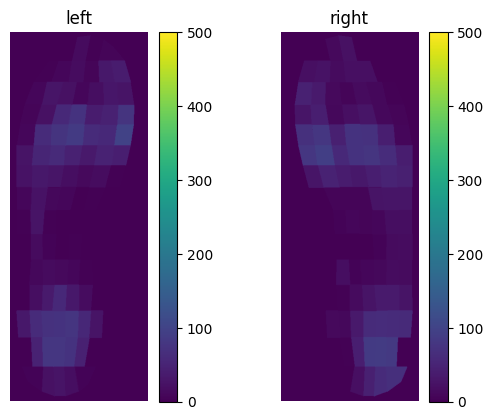

In [46]:
from src.tool import visual

visual.draw_heatmap(
    static_t.cpu().detach().numpy() * 600,
    '../../data/processed/left_foot_mask.png',
    vmax=500, is_export=True, export_path=f'output/static.png',
    )

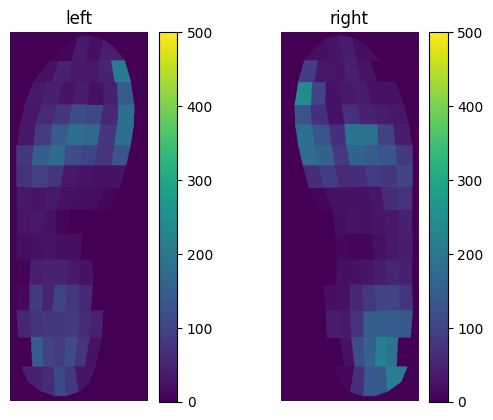

In [47]:
from src.tool import visual

visual.draw_heatmap(
    dynamic_t.cpu().detach().numpy() * 600,
    '../../data/processed/left_foot_mask.png',
    vmax=500, is_export=True, export_path=f'output/dynamic.png',
    )

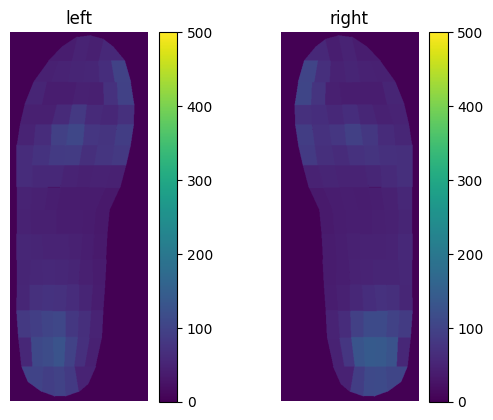

In [48]:
from src.tool import visual

visual.draw_heatmap(
    pedar_pred.cpu().detach().numpy() * 600,
    '../../data/processed/left_foot_mask.png',
    vmax=500, is_export=True, export_path=f'output/dynamic_pred.png',
    )